# **목표**  
2017.12.1~2018.10.31 까지의 따릉이 대여량 및 날씨, 계절, 기온 등의 데이터를 기반으로 2018년 11월 따릉이 대여량 예측하기

# 1 데이터 불러오기

In [1]:
#  # colab 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 사용을 위해 설치
# 아래 코드 실행하면 한글 폰트 설치할 필요 없음!
!pip install koreanize-matplotlib
import koreanize_matplotlib

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.4 MB/s eta 0:00:00


In [2]:
raw_train = pd.read_csv('/content/drive/MyDrive/비어플/dataset/train.csv')
raw_test = pd.read_csv('/content/drive/MyDrive/비어플/dataset/test.csv')

In [3]:
train = raw_train.copy()
test = raw_test.copy()

In [4]:
train.shape, test.shape

((8040, 14), (720, 13))

# 2 데이터 살펴보기

In [5]:
# 데이터 확인
train.head(5)

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# 중복된 행 없음
train.duplicated().sum()

0

-    Date: 날짜 (YYYY-MM-DD 형식)
-    Rented Bike Count: 해당 시간에 대여된 자전거 수
-    Hour: 시간 (0~23, 24시간 형식)
-    Temperature(°C): 섭씨 온도
-    Humidity(%): 상대 습도 (%)
-    Wind speed (m/s): 풍속 (초속 m)
-   Visibility (10m): 가시거리 (단위가 10m이므로, 예를 들어 값이 20이면 200m)
-    Dew point temperature(°C): 이슬점 온도 (공기가 포화 상태가 되어 물방울이 맺히는 온도)
-    Solar Radiation (MJ/m²): 태양 복사 에너지 (단위: 메가줄/제곱미터)
-    Rainfall(mm): 강우량 (밀리미터)
-    Snowfall (cm): 강설량 (센티미터)
-    Seasons: 계절 (봄, 여름, 가을, 겨울)
-   Holiday: 공휴일 여부 (공휴일이면 Yes, 아니면 No)
-   Functioning Day: 자전거 대여소 운영 여부 (운영하면 Yes, 아니면 No)

In [7]:
# 데이터 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [8]:
# 데이터 기술통계량
train.describe()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


**먼저 target값의 분포를 살펴보자**

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

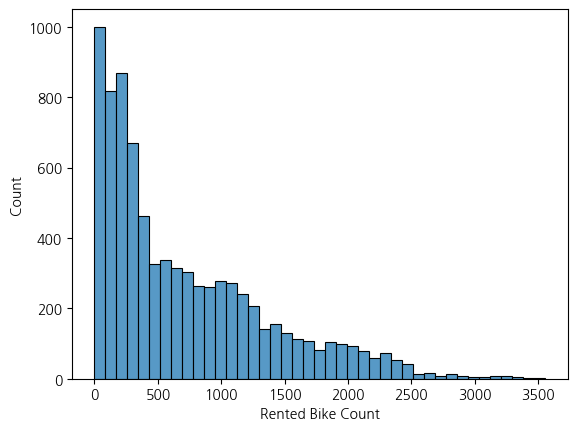

In [9]:
sns.histplot(data=train['Rented Bike Count'])  # 매우 right-skewed 되어있다.

**본격적으로 데이터 분석하기 전에 분석의 편의성을 위해 변수명을 수정**

In [10]:
columns = train.columns.to_list()
train.columns = ['Date',
                'Target',
                'Hour',
                'Temp',
                'Humidity',
                'Wind_speed',
                'Visibility',
                'Dew_point_temperature',
                'Solar_Radiation',
                'Rainfall',
                'Snowfall',
                'Seasons',
                'Holiday',
                'Functioning_Day']

In [11]:
train.head() # 보기 편해짐

,Date,Target,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Date 변수도 Year, Month, Day 로 나누어야 정확한 분석을 할 수 있다.   
주말 여부도 중요할 것으로 생각하여 새로운 열 생성  
모든 행이 1시간단위로 연속되어있는지 확인해보기**

In [12]:
# 문자열 날짜를 datetime 형식으로 변환 (일/월/연도 형식)
train['Date'] = pd.to_datetime(train['Date'], format='%d/%m/%Y')

# 새로운 열을 맨 앞에 삽입 (원하는 순서대로 위치 지정)
train.insert(0, 'Year', train['Date'].dt.year)   # 맨 앞(인덱스 0)에 Year 열 삽입
train.insert(1, 'Month', train['Date'].dt.month)   # 인덱스 1에 Month 열 삽입
train.insert(2, 'Day', train['Date'].dt.day)       # 인덱스 2에 Day 열 삽입
train.insert(3, 'Weekend', train['Date'].dt.weekday.isin([5, 6]).astype(int)) # 주말이면 1 아니면 0

train['datetime'] = pd.to_datetime(train[['Year', 'Month', 'Day']]) + pd.to_timedelta(train['Hour'], unit='h')
train['datetime'].diff().max() # 시계열 데이터의 연속성 확인

Timedelta('0 days 01:00:00')

In [13]:
train.head()

,Year,Month,Day,Weekend,Date,Target,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,datetime
0,2017,12,1,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,2017-12-01 00:00:00
1,2017,12,1,0,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017,12,1,0,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017,12,1,0,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017,12,1,0,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00


## 2.1 결측치를 확인해보자

In [14]:
# 이상치 확인
train.isna().sum()
# Temp	800
# Wind_speed	802
# Seasons	802

,0
Year,0
Month,0
Day,0
Weekend,0
Date,0
Target,0
Hour,0
Temp,800
Humidity,0
Wind_speed,802


**결측치의 개수가 적지 않으므로 결측치 보간을 해야한다**  
상식적으로 이 데이터 셋은 시계열 데이터이므로 Temp, Wind_speed, Seasons는 주변 행을 이용하여 보간할수있다.  
그러나 혹시 모르니 확인은 해보자!  

### 2.1.1 Temp
1. 생각: 시간에 따른 온도의 변화는 smooth할 것이다. 그러나 이를 하나하나 확인하여 일반화 할 수는 없으므로 시간별 평균을 낸 후에 이 값이 smooth한지 확인해보자. 만약 smooth하다면 선형보간을 사용해도 나쁘지 않을 것이다..  
2. 위 방법을 기본으로 하되 만약 연속된 행이 매우 많이 결측되어있다면 다른 방법을 생각해야한다.

- **(선형적으로 보간하는게 의미가 없으므로)**  
- (ex) 어느날 아침 8시부터 저녁 8시까지의 온도가 모두 결측되어있는 경우
- **'연속적으로 결측된 행의 개수를'**  확인해보자!!!

<Axes: xlabel='Hour'>

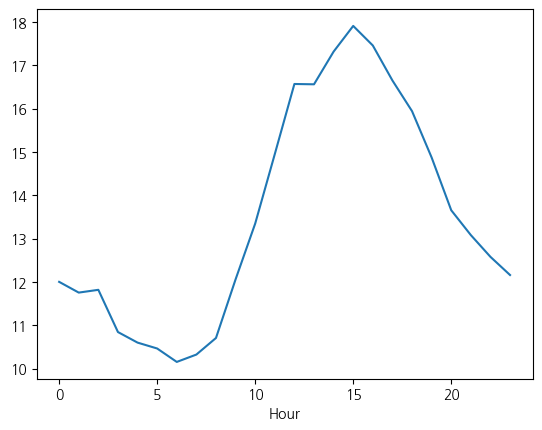

In [15]:
train.groupby('Hour')['Temp'].mean().plot() # smooth해 보이므로 선형보간으로 해도 괜찮을 것 같다.

In [16]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = train['Temp'].isna().to_list() # Temp의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

4

**최대 연속 결측행의 수는   4이므로 선형보간을 적용해도 큰 문제가 없을것으로 보인다**

In [17]:
print(train['Temp'].isna().sum()) # 원래 결측치 수
train['Temp'].interpolate(method='linear', inplace=True)
print(train['Temp'].isna().sum()) # 결측치 보간 이후

800
0


<ipython-input-17-851ff252717b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Temp'].interpolate(method='linear', inplace=True)


### 2.1.2 Wind_speed

Temp와 같은 idea를 적용한다

<Axes: xlabel='Hour'>

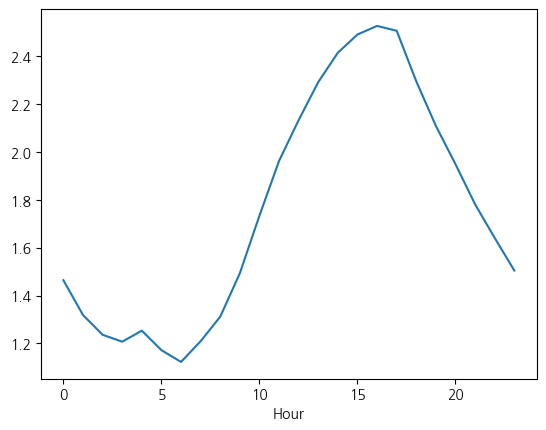

In [18]:
train.groupby('Hour')['Wind_speed'].mean().plot() # smooth해 보이므로 선형보간으로 해도 괜찮을 것 같다.

In [19]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = train['Wind_speed'].isna().to_list() # Temp의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

3

**최대 연속 결측행의 수는 3이므로 선형보간을 적용해도 큰 문제가 없을것으로 보인다**

In [20]:
print(train['Wind_speed'].isna().sum()) # 원래 결측치 수
train['Wind_speed'].interpolate(method='linear', inplace=True)
print(train['Wind_speed'].isna().sum()) # 결측치 보간 이후

802
0


<ipython-input-20-7bf6c3160239>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Wind_speed'].interpolate(method='linear', inplace=True)


### 2.1.3 Seasons

Seasons는 범주형변수이고 이미 날짜는 알고있으므로 주변 행들을 참고하여 채워주자

In [21]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = train['Seasons'].isna().to_list() # Temp의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

3

**최대 연속 결측행의 수는 3이므로 위 아래 행들을 참고해도 괜찮을 것이다**

In [22]:
print(train['Seasons'].isna().sum()) # 원래 결측치수
train['Seasons'].fillna(method='bfill',inplace = True)   # 결측치를 바로 이전 행의 값으로 채운다.
print(train['Seasons'].isna().sum())  # 보간 후

802
0


<ipython-input-22-b473596ecdf4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Seasons'].fillna(method='bfill',inplace = True)   # 결측치를 바로 이전 행의 값으로 채운다.
<ipython-input-22-b473596ecdf4>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Seasons'].fillna(method='bfill',inplace = True)   # 결측치를 바로 이전 행의 값으로 채운다.


train 데이터에서 모든 결측치를 보간 하였다 다시한번 확인해보자.

In [23]:
train.isna().sum().sum() # 0임을 확인!!

0

## 2.2 이상치를 확인해보자

각 변수들에 대해 이상치를 확인해보자
1. 먼저 계절부터 확인하고
2. 나머지 수치형 변수들 확인하기

In [24]:
train[['Month','Seasons']].value_counts() # 계절은 다 적절하게 맵핑되어 있다.

,,count
Month,Seasons,
1,Winter,744
3,Spring,744
5,Spring,744
7,Summer,744
8,Summer,744
10,Autumn,744
12,Winter,744
4,Spring,720
6,Summer,720


In [25]:
# 최대 최소 확인
train.describe().T[['min','max']]

# Target	0.0	3556.0                      # 최솟값이 0... 이후에 확인해보자
# Temp	-17.8	39.4                        # 상식적인 범위이다. 문제없음
# Humidity	0.0	98.0                      # 습도가 0인것은 측정오류일 것이므로 수정해야한다. 문제있음
# Wind_speed	0.0	7.4                     # 풍속이 0인것은 측정오류일 것이므로 수정해야한다. 문제있음
# Visibility	27.0	2000.0                # 아마도 상식적인 범위이다.문제없음
# Dew_point_temperature	-30.6	27.2        # 아마도 상식적인 범위이다.문제없음
# Solar_Radiation	0.0	3.52                # 밤에는 0인것이 당연하다. 문제없음
# Rainfall	0.0	35.0                      # 문제없음
# Snowfall	0.0	5.1                       # 문제없음


,min,max
Year,2017.0,2018.0
Month,1.0,12.0
Day,1.0,31.0
Weekend,0.0,1.0
Date,2017-12-01 00:00:00,2018-10-31 00:00:00
Target,0.0,3556.0
Hour,0.0,23.0
Temp,-17.8,39.4
Humidity,0.0,98.0
Wind_speed,0.0,7.4


### 2.2.1 Target 변수 확인 (왜 0인값이 있을까? 측정 오류일까?)

In [26]:
train[train['Target']== 0].head(5) # 확인해본 결과 Functioning_Day가 No이다. 즉, 자전거 대여가 안되는 날

,Year,Month,Day,Weekend,Date,Target,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,datetime
3144,2018,4,11,0,2018-04-11,0,0,14.35,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018-04-11 00:00:00
3145,2018,4,11,0,2018-04-11,0,1,13.60,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018-04-11 01:00:00
3146,2018,4,11,0,2018-04-11,0,2,12.70,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018-04-11 02:00:00
3147,2018,4,11,0,2018-04-11,0,3,11.60,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018-04-11 03:00:00
3148,2018,4,11,0,2018-04-11,0,4,10.20,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018-04-11 04:00:00


In [27]:
# 더 자세히 살펴보자
no_index = train['Functioning_Day'] == 'No' # 불리언 변수 저장
print(train.loc[no_index, 'Target'].max())  # 대여 불가능한 날 -> 모두 0
print(train.loc[~no_index, 'Target'].min())  # 대여 가능한 날 -> 0인 경우 없음

0
2


**Functioning_Day == 'No'인 행들의 Target값들은 모두 0임을 알수있다!  
따라서 추후에 모델링 할때 No인 행들은 다 제거하고 학습하는 것이 유용    
직관적으로 정답이 정해져 있는데 머신러닝 모델링을 할 이유가 없다.  
테스트 데이터에서 No인 행들은 모두 Target을 0으로 예측하면 된다.**

### 2.2.2 Humidity 변수 처리
결측치 처리 후 보간

In [28]:
train.loc[train['Humidity']==0,'Humidity'] = np.NaN # 결측치처리

<Axes: xlabel='Hour'>

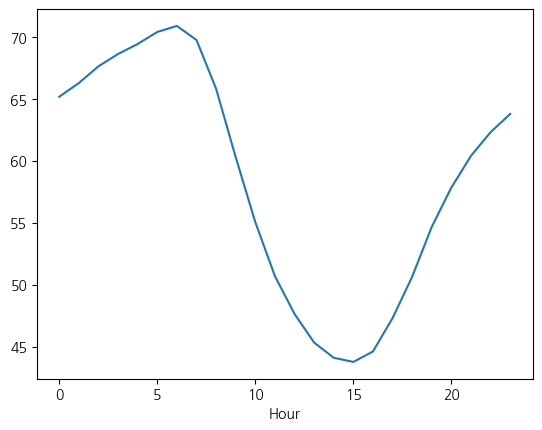

In [29]:
train.groupby('Hour')['Humidity'].mean().plot() # smooth해 보이므로 선형보간으로 해도 괜찮을 것 같다.

In [30]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = train['Humidity'].isna().to_list() # Humidity의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

6

6시간이면 선형보간이 적절하게 결측치를 잡아내지 못할수도 있지만   
결측치가 많지는 않으므로 그냥 진행

In [31]:
print(train['Humidity'].isna().sum())
train['Humidity'].interpolate(method='linear', inplace=True)
print(train['Humidity'].isna().sum()) # 결측치 보간 이후

17
0


<ipython-input-31-b48d0713d644>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Humidity'].interpolate(method='linear', inplace=True)


### 2.2.3 Wind_speed 변수처리
결측치 처리 후 보간

In [32]:
train.loc[train['Wind_speed']==0,'Wind_speed'] = np.NaN # 결측치처리

<Axes: xlabel='Hour'>

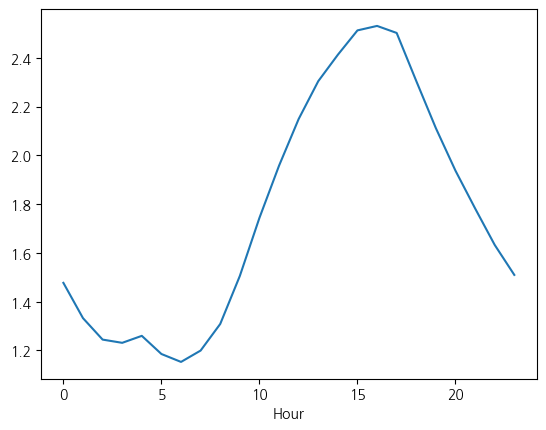

In [33]:
train.groupby('Hour')['Wind_speed'].mean().plot() # smooth해 보이므로 선형보간으로 해도 괜찮을 것 같다.

In [34]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = train['Wind_speed'].isna().to_list() # Humidity의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

24

24시간이 연속적으로 결측되어있다 선형보간 불가능..  
데이터가 그리 많지 않으므로 시간대별 평균으로 보간

In [35]:
print(train['Wind_speed'].isna().sum())  #  결측치 수
train['Wind_speed'] = train.groupby('Hour')['Wind_speed'].transform(lambda x: x.fillna(x.mean()))
print(train['Wind_speed'].isna().sum()) # 결측치 보간 이후

55
0


## 3 특성 선택
-  'Year'     # 넣지 않는것이 적절하다고 생각(년도를 넣으려면 적어도 5년 이상은 있어야 한다고 생각)
-  'Month'    # 온도와 상관관계
-  'Day'      # 전혀 의미 x
-  'Weekend'  # 중요 -> Hour과 시너지 효과
-  'Date'     # 의미 x
-  'Target'   # 예측해야하는 값
-  'Hour'     # 중요
-  'Temp'     # 중요
-  'Humidity' # 날씨관련
-  'Wind_speed' # 날씨관련
-  'Visibility' # 날씨관련
-  'Dew_point_temperature' # 날씨관련
-  'Solar_Radiation' # 날씨관련
-  'Rainfall' # 비
-  'Snowfall' # 눈
-  'Seasons' # 계절
-  'Holiday' # 공휴일
-  'Functioning_Day'
-  'datetime # 의미 x

In [36]:
# 우선적으로 Functiong_Day가 No인 값들 분리
no_train = train[train['Functioning_Day'] =='No']
yes_train = train[train['Functioning_Day'] =='Yes']

<Axes: xlabel='Hour', ylabel='Target'>

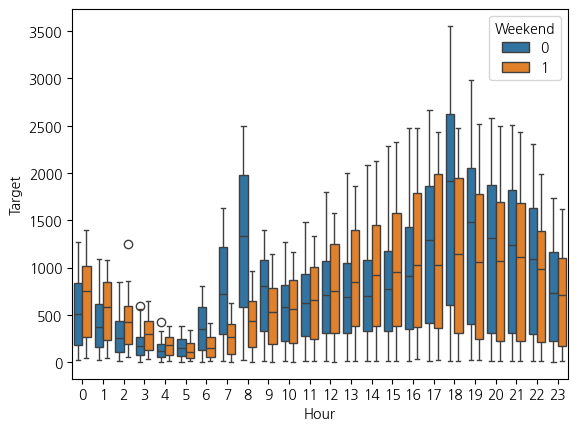

In [37]:
sns.boxplot(yes_train, x='Hour', y='Target', hue='Weekend') # 평일에는 확실히 출퇴근시간에 높음 # 주말은 smooth

<Axes: xlabel='Hour', ylabel='Target'>

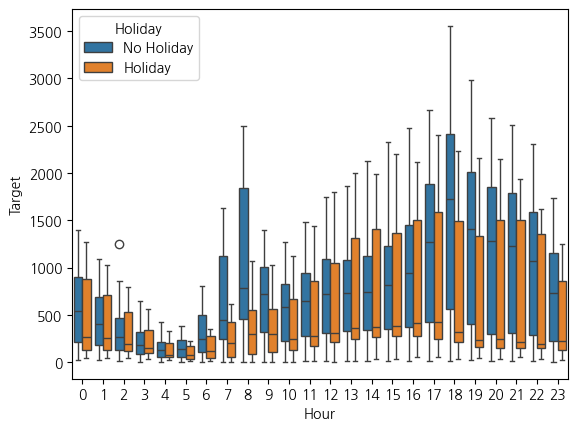

In [38]:
sns.boxplot(yes_train, x='Hour', y='Target', hue='Holiday') # 위와 비슷하게 공휴일은 smooth # 아닌날은 출퇴근 피크

In [39]:
yes_train.columns
# ['Year', 'Month', 'Day', 'Weekend', 'Date', 'Target', 'Hour', 'Temp',
#        'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature',
#        'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
#        'Functioning_Day', 'datetime']
features = ['Month', 'Weekend', 'Hour', 'Temp',
       'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday']
# features = ['Month', 'Weekend', 'Hour', 'Temp','Wind_speed', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday']

In [40]:
yes_train_features = yes_train[features]
y = yes_train['Target'].to_numpy()
yes_train_features

,Month,Weekend,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,12,0,0,-5.2,37.0,2.200000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,12,0,1,-5.5,38.0,0.800000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,12,0,2,-6.0,39.0,1.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,12,0,3,-6.2,40.0,0.900000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,12,0,4,-6.0,36.0,1.200000,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,10,0,19,8.4,53.0,1.066667,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday
8036,10,0,20,7.6,59.0,0.700000,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday
8037,10,0,21,7.6,59.0,3.000000,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday
8038,10,0,22,6.8,58.0,2.200000,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday


## 4 범주형 변수 인코딩  

In [41]:
# pd.get_dummies()를 사용하여 one-hot 인코딩
yes_train_features = pd.get_dummies(yes_train_features, columns=['Seasons','Holiday'],drop_first=True)

## 5 특성 스케일링

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
yes_train_std = ss.fit_transform(yes_train_features)

## 6 모델링
시계열 데이터이므로(미래 데이터를 예측해야 하므로) 교차검증에 **TimeSeriesSplit을** 적용하였다

## 6.1 모델 고르기

In [43]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# 데이터 준비: yes_train_std, y (전처리 완료된 시계열 데이터)
# TimeSeriesSplit 객체 생성 (예: 5-fold)
tscv = TimeSeriesSplit(n_splits=5)

# 후보 모델 정의
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {}
for name, model in models.items():
    try:
        scores = cross_val_score(model, yes_train_std, y, cv=tscv, scoring='r2')
        results[name] = scores
        print(f"{name}: Mean R² = {np.mean(scores):.4f}, Fold scores = {scores}")
    except Exception as e:
        print(f"{name} 에서 에러 발생: {e}")


LinearRegression: Mean R² = 0.1623, Fold scores = [ 0.39430304  0.21970599  0.32704581 -0.46945735  0.33999923]
Ridge: Mean R² = 0.1622, Fold scores = [ 0.39381672  0.21918766  0.32647606 -0.46840572  0.33993152]
Lasso: Mean R² = 0.1674, Fold scores = [ 0.36765848  0.20486251  0.29458307 -0.45405142  0.42410116]
RandomForestRegressor: Mean R² = 0.6233, Fold scores = [0.47333187 0.53295135 0.75728597 0.56755315 0.78542146]


## 6.2 하이퍼 파라미터 최적화

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
# 하이퍼파라미터 튜닝
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100]
}
# GridSearchCV를 사용해 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(yes_train_std, y)

print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 교차검증 R² 점수:", grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
최적의 하이퍼파라미터: {'n_estimators': 100}
최고의 교차검증 R² 점수: 0.6233087617193989


In [46]:
best = grid_search.best_estimator_
best.fit(yes_train_std, y)

RandomForestRegressor(random_state=42)

## 6.3 test셋 전처리

In [47]:
test_raw = pd.read_csv("/content/drive/MyDrive/비어플/dataset/test.csv")
test = test_raw.copy()

### 6.3.1 이상치 처리 및 결측치 보간 등등

In [48]:
test.columns = ['Date',
                'Hour',
                'Temp',
                'Humidity',
                'Wind_speed',
                'Visibility',
                'Dew_point_temperature',
                'Solar_Radiation',
                'Rainfall',
                'Snowfall',
                'Seasons',
                'Holiday',
                'Functioning_Day']

In [49]:
# 문자열 날짜를 datetime 형식으로 변환 (일/월/연도 형식)
test['Date'] = pd.to_datetime(test['Date'], format='%d/%m/%Y')

# 새로운 열을 맨 앞에 삽입 (원하는 순서대로 위치 지정)
test.insert(0, 'Year', test['Date'].dt.year)   # 맨 앞(인덱스 0)에 Year 열 삽입
test.insert(1, 'Month', test['Date'].dt.month)   # 인덱스 1에 Month 열 삽입
test.insert(2, 'Day', test['Date'].dt.day)       # 인덱스 2에 Day 열 삽입
test.insert(3, 'Weekend', test['Date'].dt.weekday.isin([5, 6]).astype(int)) # 주말이면 1 아니면 0

test['datetime'] = pd.to_datetime(test[['Year', 'Month', 'Day']]) + pd.to_timedelta(test['Hour'], unit='h')
test['datetime'].diff().max() # 시계열 데이터의 연속성 확인

Timedelta('0 days 01:00:00')

In [50]:
test.describe().T[['min','max']]

,min,max
Year,2018.0,2018.0
Month,11.0,11.0
Day,1.0,30.0
Weekend,0.0,1.0
Date,2018-11-01 00:00:00,2018-11-30 00:00:00
Hour,0.0,23.0
Temp,-3.0,19.3
Humidity,13.0,97.0
Wind_speed,0.0,5.3
Visibility,33.0,2000.0


In [51]:
test.loc[test['Wind_speed']==0,'Wind_speed'] = np.NaN # 결측치처리

In [52]:
test.isna().sum()
# Temp	76
# Wind_speed	88
# Seasons	74

,0
Year,0
Month,0
Day,0
Weekend,0
Date,0
Hour,0
Temp,76
Humidity,0
Wind_speed,88
Visibility,0


In [53]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = test['Temp'].isna().to_list() # Temp의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

3

In [54]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = test['Wind_speed'].isna().to_list() # Temp의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

5

In [55]:
# 연속적으로 결측된 행의 개수 확인하기
missing_list = test['Seasons'].isna().to_list() # Temp의 결측치 불리언

max_list = []
max=0
for is_missing in missing_list:
    if is_missing:
        max +=1
    else:
        max = 0
    max_list.append(max)
np.max(max_list) # 최대 연속적으로 결측된 행의 개수

3

모두 선형보간 해도 괜찮을것 같다.

In [56]:
print(test['Temp'].isna().sum()) # 원래 결측치 수
test['Temp'].interpolate(method='linear', inplace=True)
print(test['Temp'].isna().sum()) # 결측치 보간 이후

76
0


<ipython-input-56-7bcedd4f836e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Temp'].interpolate(method='linear', inplace=True)


In [57]:
print(test['Wind_speed'].isna().sum()) # 원래 결측치 수
test['Wind_speed'].interpolate(method='linear', inplace=True)
print(test['Wind_speed'].isna().sum()) # 결측치 보간 이후

88
0


<ipython-input-57-b071c1916b2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Wind_speed'].interpolate(method='linear', inplace=True)


In [58]:
print(test['Seasons'].isna().sum()) # 원래 결측치수
test['Seasons'].fillna(method='bfill',inplace = True)   # 결측치를 바로 이전 행의 값으로 채운다.
print(test['Seasons'].isna().sum())  # 보간 후

74
0


<ipython-input-58-1213d877a223>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Seasons'].fillna(method='bfill',inplace = True)   # 결측치를 바로 이전 행의 값으로 채운다.
<ipython-input-58-1213d877a223>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test['Seasons'].fillna(method='bfill',inplace = True)   # 결측치를 바로 이전 행의 값으로 채운다.


6.3.2 특성 선택, 범주형 변수인코딩, 특성 스케일링

In [59]:
# 우선적으로 Functiong_Day가 No인 값들 분리
no_test = test[test['Functioning_Day'] =='No']
yes_test = test[test['Functioning_Day'] =='Yes']

In [60]:
yes_test_features = yes_test[features]

In [61]:
yes_test_features

,Month,Weekend,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,11,0,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday
1,11,0,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday
2,11,0,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday
3,11,0,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday
4,11,0,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,11,0,19,4.2,34,2.60,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
716,11,0,20,3.4,37,2.30,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
717,11,0,21,2.6,39,0.30,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
718,11,0,22,2.1,41,1.00,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [62]:
# 원핫인코딩 (train 기준)
yes_test_features= pd.get_dummies(yes_test_features,columns=['Seasons','Holiday'])
# train과 동일한 컬럼을 유지하고 없는 것은 0으로 채움
yes_test_features = yes_test_features.reindex(columns=yes_train_features.columns, fill_value=0)

yes_test_features.head()

,Month,Weekend,Hour,Temp,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,11,0,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,0,0,0,True
1,11,0,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,0,0,0,True
2,11,0,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,0,0,0,True
3,11,0,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,0,0,0,True
4,11,0,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,0,0,0,True


In [63]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
yes_test_std = ss.fit_transform(yes_test_features)

## 예측완료

In [68]:
yes_test_y=pd.DataFrame(best.predict(yes_test_std)) # 영업하는날 예측

In [73]:
yes_test_y.index = yes_test_features.index
full_index = range(yes_test_y.index.min(), yes_test_y.index.max() + 1) #
test_y = yes_test_y.reindex(full_index, fill_value=0) # 영업안하는날은 모두 0으로 채워넣기

In [74]:
test_y.groupby() # 완성

,0
0,599.16
1,410.86
2,221.13
3,130.85
4,97.80
...,...
715,816.54
716,702.86
717,726.23
718,579.65
